# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [10]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
import time

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
weather_api_key

'b673a80d44197678e46eaeed96639374'

In [11]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [44]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units= "imperial"
query_url = f"{url}appid={weather_api_key}&units={units}&q="



In [45]:
cities=cities[0:-1]
responses = []

for city in cities:
    response = requests.get(query_url + city).json()
    responses.append(response)


In [46]:
raw_df = pd.json_normalize(responses)


In [47]:
raw_df

,weather,base,visibility,dt,timezone,id,name,cod,coord.lon,coord.lat,...,wind.deg,wind.gust,clouds.all,sys.country,sys.sunrise,sys.sunset,sys.type,sys.id,rain.1h,message
0,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000.0,1.627842e+09,-10800.0,3440777.0,Rocha,200,-54.3333,-34.4833,...,166.0,5.50,4.0,UY,1.627814e+09,1.627851e+09,NaN,NaN,NaN,NaN
1,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627842e+09,10800.0,546105.0,Nikolskoye,200,30.7861,59.7035,...,245.0,26.26,60.0,RU,1.627782e+09,1.627842e+09,1.0,8926.0,NaN,NaN
2,"[{'id': 500, 'main': 'Rain', 'description': 'l...",stations,10000.0,1.627842e+09,25200.0,1213855.0,Sibolga,200,98.7792,1.7427,...,21.0,3.69,98.0,ID,1.627860e+09,1.627904e+09,NaN,NaN,0.49,NaN
3,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,804.0,1.627842e+09,25200.0,1507390.0,Dikson,200,80.5464,73.5069,...,250.0,3.44,100.0,RU,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN
4,"[{'id': 801, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627842e+09,-21600.0,6185377.0,Yellowknife,200,-114.3525,62.4560,...,70.0,1.01,20.0,CA,1.627816e+09,1.627878e+09,2.0,19346.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
592,"[{'id': 800, 'main': 'Clear', 'description': '...",stations,10000.0,1.627842e+09,-10800.0,3456642.0,Mozarlândia,200,-50.5706,-14.7447,...,189.0,6.17,6.0,BR,1.627811e+09,1.627852e+09,NaN,NaN,NaN,NaN
593,"[{'id': 804, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627842e+09,32400.0,2026861.0,Berdigestyakh,200,126.6992,62.0989,...,56.0,6.62,97.0,RU,1.627844e+09,1.627907e+09,NaN,NaN,NaN,NaN
594,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627842e+09,7200.0,3149510.0,Koppang,200,11.0555,61.5706,...,5.0,16.82,80.0,NO,1.627786e+09,1.627848e+09,NaN,NaN,NaN,NaN
595,"[{'id': 803, 'main': 'Clouds', 'description': ...",stations,10000.0,1.627842e+09,0.0,3416888.0,Grindavik,200,-22.4338,63.8424,...,280.0,NaN,75.0,IS,1.627793e+09,1.627857e+09,1.0,90.0,NaN,NaN


In [48]:
weather_df = raw_df[['name', 'coord.lat','coord.lon','main.temp_max', 'main.humidity','clouds.all','wind.speed','sys.country','dt']]
weather_df.columns = ["city", "Lat", "Lon", "max_temp","Humidity","Cloudiness","Wind Speed","Country","Date"]


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [49]:
weather_df.describe()

,Lat,Lon,max_temp,Humidity,Cloudiness,Wind Speed,Date
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,5.520000e+02
mean,19.835599,17.580144,71.645435,66.851449,52.708333,8.019692,1.627842e+09
std,32.690661,90.795984,14.899392,22.840241,37.443970,5.621699,5.536722e+01
min,-54.800000,-175.200000,31.840000,8.000000,0.000000,0.000000,1.627842e+09
25%,-5.315850,-65.421500,60.690000,55.000000,16.750000,3.955000,1.627842e+09
50%,22.426100,23.808300,73.705000,72.000000,57.500000,6.880000,1.627842e+09
75%,46.236650,97.725400,81.812500,84.000000,90.000000,10.770000,1.627842e+09
max,78.218600,179.316700,110.080000,100.000000,100.000000,31.070000,1.627842e+09


In [50]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        552 non-null    object 
 1   Lat         552 non-null    float64
 2   Lon         552 non-null    float64
 3   max_temp    552 non-null    float64
 4   Humidity    552 non-null    float64
 5   Cloudiness  552 non-null    float64
 6   Wind Speed  552 non-null    float64
 7   Country     552 non-null    object 
 8   Date        552 non-null    float64
dtypes: float64(7), object(2)
memory usage: 42.1+ KB


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [51]:
 #  Get the indices of cities that have humidity over 100%.
weather_df.loc[weather_df["Humidity"] > 100]
clean_city_data = weather_df.sort_values("Humidity").reset_index(drop=False)
clean_city_data.head()

,index,city,Lat,Lon,max_temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,34,Diego de Almagro,-26.3667,-70.0500,82.83,8.0,0.0,9.26,CL,1.627842e+09
1,7,Ubari,26.5921,12.7805,95.99,8.0,0.0,8.08,LY,1.627842e+09
2,15,Gazli,40.1333,63.4500,89.89,9.0,0.0,14.50,UZ,1.627842e+09
3,453,Tabas,33.5959,56.9244,91.60,9.0,12.0,10.02,IR,1.627842e+09
4,438,Sabha,27.0377,14.4283,95.97,9.0,0.0,6.04,LY,1.627842e+09


In [52]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data.dropna(how='any',inplace=True)
clean_city_data

,index,city,Lat,Lon,max_temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,34,Diego de Almagro,-26.3667,-70.0500,82.83,8.0,0.0,9.26,CL,1.627842e+09
1,7,Ubari,26.5921,12.7805,95.99,8.0,0.0,8.08,LY,1.627842e+09
2,15,Gazli,40.1333,63.4500,89.89,9.0,0.0,14.50,UZ,1.627842e+09
3,453,Tabas,33.5959,56.9244,91.60,9.0,12.0,10.02,IR,1.627842e+09
4,438,Sabha,27.0377,14.4283,95.97,9.0,0.0,6.04,LY,1.627842e+09
...,...,...,...,...,...,...,...,...,...,...
547,377,Omsukchan,62.5333,155.8000,33.66,99.0,100.0,6.78,RU,1.627842e+09
548,154,Ouadda,8.0777,22.4007,67.01,99.0,100.0,2.17,CF,1.627842e+09
549,530,Mawlaik,23.6333,94.4167,76.24,100.0,100.0,2.01,MM,1.627842e+09
550,296,Praia da Vitória,38.7333,-27.0667,77.76,100.0,75.0,18.90,PT,1.627842e+09


In [24]:
clean_city_data=clean_city_data[:500]
clean_city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   index       500 non-null    int64  
 1   city        500 non-null    object 
 2   Lat         500 non-null    float64
 3   Lon         500 non-null    float64
 4   max_temp    500 non-null    float64
 5   Humidity    500 non-null    float64
 6   Cloudiness  500 non-null    float64
 7   Wind Speed  500 non-null    float64
 8   Country     500 non-null    object 
 9   Date        500 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 43.0+ KB


In [53]:
clean_city_data.to_csv('../output_data/citiesApi.csv', index=False)


In [54]:
clean_city_data.tail()

,index,city,Lat,Lon,max_temp,Humidity,Cloudiness,Wind Speed,Country,Date
547,377,Omsukchan,62.5333,155.8000,33.66,99.0,100.0,6.78,RU,1.627842e+09
548,154,Ouadda,8.0777,22.4007,67.01,99.0,100.0,2.17,CF,1.627842e+09
549,530,Mawlaik,23.6333,94.4167,76.24,100.0,100.0,2.01,MM,1.627842e+09
550,296,Praia da Vitória,38.7333,-27.0667,77.76,100.0,75.0,18.90,PT,1.627842e+09
551,439,Kunming,25.0389,102.7183,58.93,100.0,0.0,6.71,CN,1.627842e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

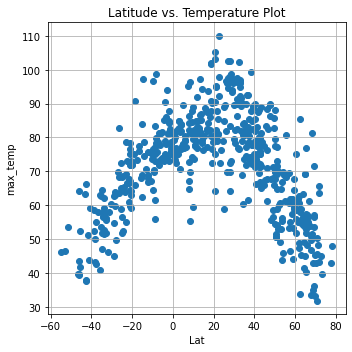

In [55]:
plt.figure(figsize=(5,5))
plt.scatter(clean_city_data['Lat'],clean_city_data['max_temp'])
plt.xlabel("Lat")
plt.ylabel("max_temp")
plt.grid()
plt.title("Latitude vs. Temperature Plot")

plt.tight_layout()

plt.show()

## Latitude vs. Humidity Plot

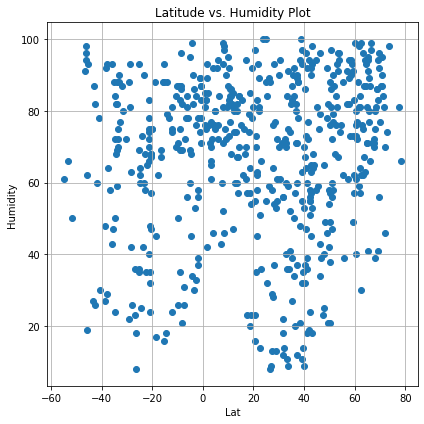

In [57]:
plt.figure(figsize=(6,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Humidity'])
plt.xlabel("Lat")
plt.ylabel("Humidity")
plt.title("Latitude vs. Humidity Plot")
plt.grid()
plt.tight_layout()
plt.show()

## Latitude vs. Cloudiness Plot

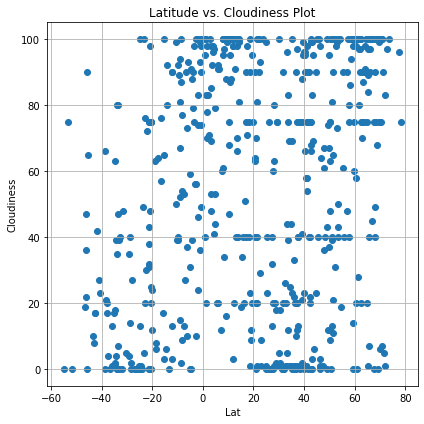

In [58]:
plt.figure(figsize=(6,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Cloudiness'])
plt.xlabel("Lat")
plt.ylabel("Cloudiness")
plt.title("Latitude vs. Cloudiness Plot")
plt.grid()
plt.tight_layout()

plt.show()

## Latitude vs. Wind Speed Plot

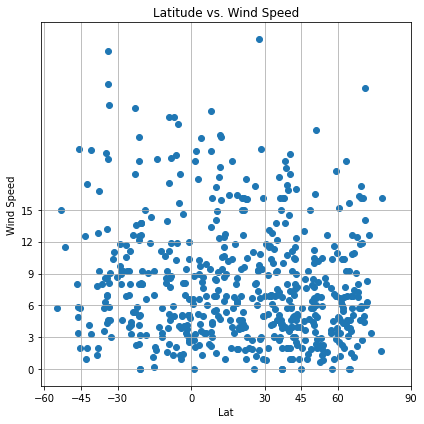

In [59]:
plt.figure(figsize=(6,6))
plt.scatter(clean_city_data['Lat'],clean_city_data['Wind Speed'])
plt.xlabel("Lat")
plt.ylabel("Wind Speed")
plt.grid()
plt.title("Latitude vs. Wind Speed")

plt.yticks([0,3,6,9,12,15])
plt.xticks([-60,-45,-30,0,30,45,60,90])
plt.tight_layout()

plt.show()

## Linear Regression

In [60]:
Northern_city_data=clean_city_data.loc[clean_city_data["Lat"] > 0]
Northern_city_data = Northern_city_data.sort_values("Lat").reset_index(drop=False)
Northern_city_data.head()
Northern_city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 386 entries, 0 to 385
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     386 non-null    int64  
 1   index       386 non-null    int64  
 2   city        386 non-null    object 
 3   Lat         386 non-null    float64
 4   Lon         386 non-null    float64
 5   max_temp    386 non-null    float64
 6   Humidity    386 non-null    float64
 7   Cloudiness  386 non-null    float64
 8   Wind Speed  386 non-null    float64
 9   Country     386 non-null    object 
 10  Date        386 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 33.3+ KB


In [61]:
Southern_city_data=clean_city_data.loc[clean_city_data["Lat"] < 0]
Southern_city_data = Southern_city_data.sort_values("Lat").reset_index(drop=False)
Southern_city_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 166 entries, 0 to 165
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   level_0     166 non-null    int64  
 1   index       166 non-null    int64  
 2   city        166 non-null    object 
 3   Lat         166 non-null    float64
 4   Lon         166 non-null    float64
 5   max_temp    166 non-null    float64
 6   Humidity    166 non-null    float64
 7   Cloudiness  166 non-null    float64
 8   Wind Speed  166 non-null    float64
 9   Country     166 non-null    object 
 10  Date        166 non-null    float64
dtypes: float64(7), int64(2), object(2)
memory usage: 14.4+ KB


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

-0.6679584291984416


<Figure size 576x576 with 0 Axes>

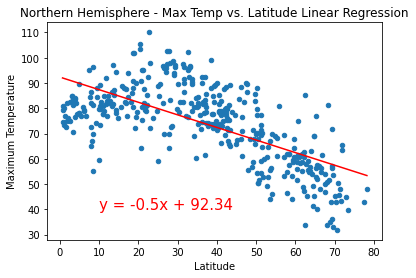

In [93]:
slope, intercept, r, p, se = linregress(Northern_city_data["Lat"],Northern_city_data["max_temp"])
print(r)
plt.figure(figsize=(8,8))

Northern_city_data.plot(kind="scatter", x="Lat", y="max_temp")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')

regress_values = Northern_city_data["Lat"] * slope + intercept
plt.plot(Northern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

plt.show()


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [64]:
plot_linear_regression

NameError: name 'plot_linear_regression' is not defined

0.8064016541818729


<Figure size 576x576 with 0 Axes>

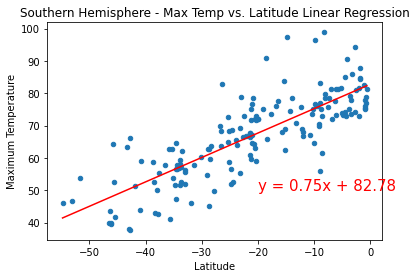

In [92]:
slope, intercept, r, p, se = linregress(Southern_city_data["Lat"],Southern_city_data["max_temp"])
print(r)
plt.figure(figsize=(8,8))

Southern_city_data.plot(kind="scatter", x="Lat", y="max_temp")
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature')

regress_values = Southern_city_data["Lat"] * slope + intercept
plt.plot(Southern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-20,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.06047508946675594


<Figure size 576x576 with 0 Axes>

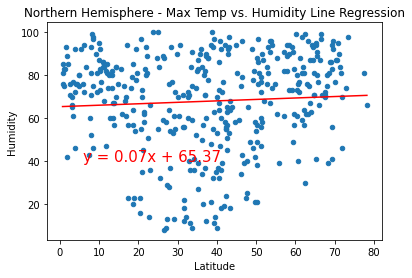

In [91]:

slope, intercept, r, p, se = linregress(Northern_city_data["Lat"],Northern_city_data["Humidity"])
print(r)
plt.figure(figsize=(8,8))

Northern_city_data.plot(kind="scatter", x="Lat", y="Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

regress_values = Northern_city_data["Lat"] * slope + intercept
plt.plot(Northern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Humidity Line Regression")

plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

0.057387939813769995


<Figure size 576x576 with 0 Axes>

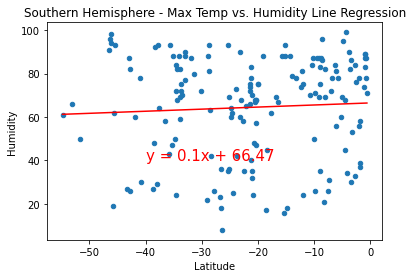

In [90]:

slope, intercept, r, p, se = linregress(Southern_city_data["Lat"],Southern_city_data["Humidity"])
print(r)
plt.figure(figsize=(8,8))

Southern_city_data.plot(kind="scatter", x="Lat", y="Humidity")
plt.xlabel('Latitude')
plt.ylabel('Humidity')

regress_values = Southern_city_data["Lat"] * slope + intercept
plt.plot(Southern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")

plt.title("Southern Hemisphere - Max Temp vs. Humidity Line Regression")

plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.030489307522235796


<Figure size 576x576 with 0 Axes>

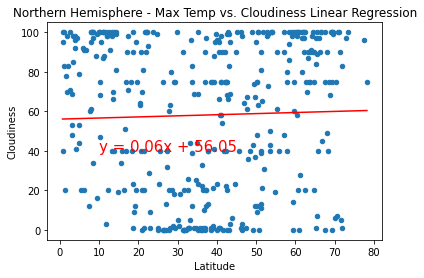

In [89]:
slope, intercept, r, p, se = linregress(Northern_city_data["Lat"],Northern_city_data["Cloudiness"])
print(r)
plt.figure(figsize=(8,8))

Northern_city_data.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

regress_values = Northern_city_data["Lat"] * slope + intercept
plt.plot(Northern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(10,40),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Cloudiness Linear Regression")

plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

0.4368797915796785


<Figure size 576x576 with 0 Axes>

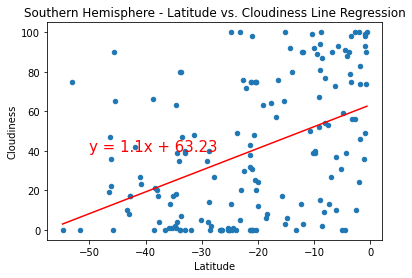

In [88]:
slope, intercept, r, p, se = linregress(Southern_city_data["Lat"],Southern_city_data["Cloudiness"])
print(r)
plt.figure(figsize=(8,8))

Southern_city_data.plot(kind="scatter", x="Lat", y="Cloudiness")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')

regress_values = Southern_city_data["Lat"] * slope + intercept
plt.plot(Southern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs. Cloudiness Line Regression")

plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.106405306626385


<Figure size 576x576 with 0 Axes>

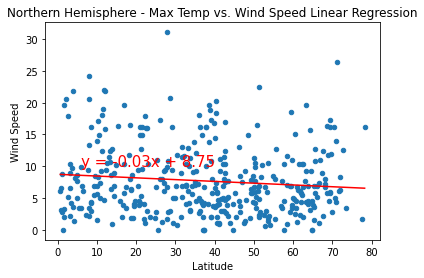

In [76]:
slope, intercept, r, p, se = linregress(Northern_city_data["Lat"],Northern_city_data["Wind Speed"])
print(r)
plt.figure(figsize=(8,8))

Northern_city_data.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

regress_values = Northern_city_data["Lat"] * slope + intercept
plt.plot(Northern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title("Northern Hemisphere - Max Temp vs. Wind Speed Linear Regression")

plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

-0.09122745531283054


<Figure size 576x576 with 0 Axes>

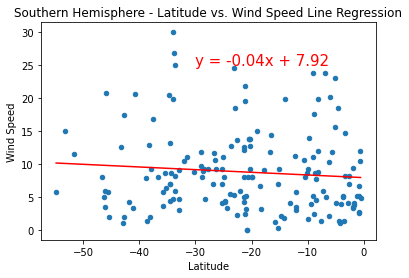

In [86]:
slope, intercept, r, p, se = linregress(Southern_city_data["Lat"],Southern_city_data["Wind Speed"])
print(r)
plt.figure(figsize=(8,8))

Southern_city_data.plot(kind="scatter", x="Lat", y="Wind Speed")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')

regress_values = Southern_city_data["Lat"] * slope + intercept
plt.plot(Southern_city_data["Lat"],regress_values,"r-")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(-30,25),fontsize=15,color="red")
plt.title("Southern Hemisphere - Latitude vs. Wind Speed Line Regression")

plt.show()


In [2]:
###Conclusions

In [ ]:
1.Tempratures of the cities close to equator are high and decreases when cities are away from equator.
2.There are more cities in northern hemisphere than Southern Hemisphere
3.wind speed is higher in southern cities as compare to northern cities